In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loans.csv')

In [3]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [6]:
df['loan_start'] = pd.to_datetime(df['loan_start'])

In [7]:
df['loan_end'] = pd.to_datetime(df['loan_end'])

In [9]:
df['loan_duration'] = df['loan_end']-df['loan_start']
df['loan_duration']

0     613 days
1     635 days
2     519 days
3     879 days
4     684 days
        ...   
438   928 days
439   511 days
440   948 days
441   633 days
442   638 days
Name: loan_duration, Length: 443, dtype: timedelta64[ns]

In [10]:
df['loan_duration'] = df['loan_duration'].dt.days

In [12]:
df['loan_duration_in_years']  = df['loan_duration']/365

In [13]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,loan_duration_in_years
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,1.679452
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,1.739726
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519,1.421918
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879,2.408219
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684,1.873973


In [14]:
df.columns

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate', 'loan_duration',
       'loan_duration_in_years'],
      dtype='object')

In [15]:
df1 = pd.read_csv('loans.csv')

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)

In [21]:
df_encoded

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,loan_duration_in_years,loan_type_credit,loan_type_home,loan_type_other
0,46109,13672,0,10243,2002-04-16,2003-12-20,2.15,613,1.679452,0,1,0
1,46109,9794,0,10984,2003-10-21,2005-07-17,1.25,635,1.739726,1,0,0
2,46109,12734,1,10990,2006-02-01,2007-07-05,0.68,519,1.421918,0,1,0
3,46109,12518,1,10596,2010-12-08,2013-05-05,1.24,879,2.408219,0,0,0
4,46109,14049,1,11415,2010-07-07,2012-05-21,3.13,684,1.873973,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
438,26945,12963,0,10330,2001-11-26,2004-06-11,2.46,928,2.542466,0,0,1
439,26945,1728,1,10248,2004-01-27,2005-06-21,5.27,511,1.400000,1,0,0
440,26945,9329,0,10154,2001-12-17,2004-07-22,5.65,948,2.597260,0,0,1
441,26945,4197,0,10333,2003-10-16,2005-07-10,4.50,633,1.734247,0,1,0


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   client_id               443 non-null    int64         
 1   loan_amount             443 non-null    int64         
 2   repaid                  443 non-null    int64         
 3   loan_id                 443 non-null    int64         
 4   loan_start              443 non-null    datetime64[ns]
 5   loan_end                443 non-null    datetime64[ns]
 6   rate                    443 non-null    float64       
 7   loan_duration           443 non-null    int64         
 8   loan_duration_in_years  443 non-null    float64       
 9   loan_type_credit        443 non-null    int64         
 10  loan_type_home          443 non-null    int64         
 11  loan_type_other         443 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(8)
memory 

In [23]:
df_encoded = df_encoded.drop(columns=['loan_start','loan_end','loan_duration'])

In [24]:
df_encoded

,client_id,loan_amount,repaid,loan_id,rate,loan_duration_in_years,loan_type_credit,loan_type_home,loan_type_other
0,46109,13672,0,10243,2.15,1.679452,0,1,0
1,46109,9794,0,10984,1.25,1.739726,1,0,0
2,46109,12734,1,10990,0.68,1.421918,0,1,0
3,46109,12518,1,10596,1.24,2.408219,0,0,0
4,46109,14049,1,11415,3.13,1.873973,1,0,0
...,...,...,...,...,...,...,...,...,...
438,26945,12963,0,10330,2.46,2.542466,0,0,1
439,26945,1728,1,10248,5.27,1.400000,1,0,0
440,26945,9329,0,10154,5.65,2.597260,0,0,1
441,26945,4197,0,10333,4.50,1.734247,0,1,0


In [25]:
correlation = df_encoded.corr()
target_corr = correlation['repaid'].sort_values(ascending=False)
target_corr

repaid                    1.000000
client_id                 0.085547
loan_type_other           0.050292
loan_type_credit          0.039718
loan_amount               0.012506
loan_duration_in_years    0.003723
rate                     -0.016172
loan_id                  -0.076472
loan_type_home           -0.088710
Name: repaid, dtype: float64

In [29]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume df is your original DataFrame
X = df_encoded.drop('repaid', axis=1)
y = df['repaid']


In [30]:
X_encoded = pd.get_dummies(X)  # One-hot encode all categorical features



In [31]:
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_encoded, y)

# Get scores
chi_scores = pd.Series(selector.scores_, index=X_encoded.columns)
chi_scores = chi_scores.sort_values(ascending=False)
print(chi_scores)



client_id                 5017.048911
loan_amount                150.808761
loan_id                     79.423747
loan_type_home               2.533941
loan_type_other              0.849825
loan_type_credit             0.530038
rate                         0.206466
loan_duration_in_years       0.000440
dtype: float64


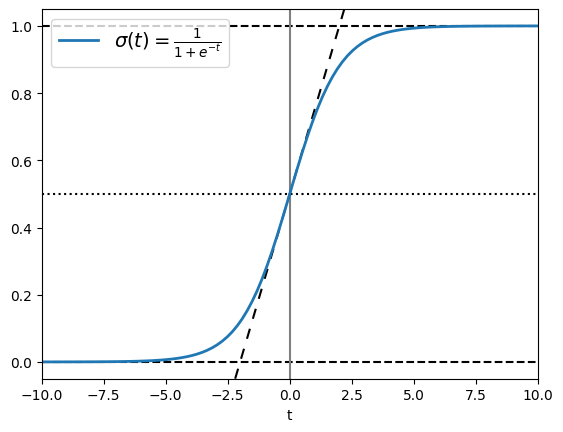

In [32]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

fig, ax = plt.subplots()
ax.axhline(y=0, color="black", linestyle="--")
ax.axhline(y=0.5, color="black", linestyle=":")
ax.axhline(y=1.0, color="black", linestyle="--")
ax.axvline(color="grey")
ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.plot(t, sig, linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
ax.set(xlim=(-10, 10), xlabel="t")
ax.legend(fontsize=14)
plt.show()